In [137]:
import pandas as pd
cc_data=pd.read_csv("/content/creditcard.csv")
cc_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [138]:
cc_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [139]:
cc_data.shape

(284807, 31)

In [140]:
284807//2



142403

In [141]:
284807*30//100


85442

In [142]:
142403+85442

227845

In [143]:
199364*20//100

39872

In [144]:
199364+39872

239236

In [145]:
#x=cc_data.iloc[:142403]
#y= cc_data[142403:227845]
#x_val= cc_data[227845:]

In [146]:
x=cc_data.iloc[:,:-1]
y=cc_data["Class"]

In [147]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [148]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [149]:
from tensorflow.keras import models
from tensorflow.keras import layers
model= models.Sequential()
model.add(layers.Dense(10, activation="relu"))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(6, activation="relu"))
model.add(layers.Dense(1,activation="sigmoid", input_shape=(284807*31, )))

In [150]:
print(len(y_test))
print(len(x_train))
print(len(y_train))

85443
199364
199364


In [151]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [164]:
x2=x_train.iloc[:,:-1]
y2=y_train


In [165]:
from sklearn.model_selection import train_test_split
par_x_train, val_x_test, par_y_train, val_y_test = train_test_split(x2, y2, test_size=0.20)

In [168]:
print(len(val_x_test))
print(len(par_x_train))

39873
159491


In [167]:
history=model.fit(par_x_train,par_y_train,epochs=100,batch_size=1000,validation_data=(val_x_test, val_y_test))


Epoch 1/100
160/160 [==============================] - 1s 4ms/step - loss: 0.3975 - accuracy: 0.9919 - val_loss: 0.4549 - val_accuracy: 0.9984
Epoch 2/100
160/160 [==============================] - 0s 3ms/step - loss: 0.4152 - accuracy: 0.9876 - val_loss: 0.4248 - val_accuracy: 0.9984
Epoch 3/100
160/160 [==============================] - 0s 3ms/step - loss: 0.2684 - accuracy: 0.9935 - val_loss: 0.1209 - val_accuracy: 0.9987
Epoch 4/100
160/160 [==============================] - 0s 3ms/step - loss: 0.4799 - accuracy: 0.9869 - val_loss: 0.0536 - val_accuracy: 0.9989
Epoch 5/100
160/160 [==============================] - 0s 3ms/step - loss: 0.2950 - accuracy: 0.9922 - val_loss: 0.2996 - val_accuracy: 0.9984
Epoch 6/100
160/160 [==============================] - 0s 3ms/step - loss: 0.7968 - accuracy: 0.9894 - val_loss: 0.1019 - val_accuracy: 0.9988
Epoch 7/100
160/160 [==============================] - 0s 3ms/step - loss: 0.6487 - accuracy: 0.9878 - val_loss: 0.2209 - val_accuracy: 0.9986

In [169]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

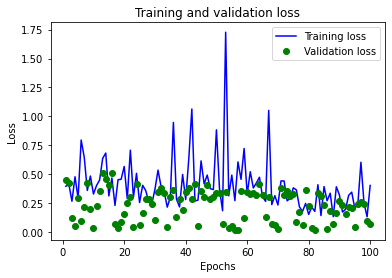

In [177]:
import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = np.arange(1, len(history_dict["accuracy"]) + 1)
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'go', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.fit(x_train,y_train,epochs=100,batch_size=1000)

In [ ]:
predict=model.predict(x_test)

In [ ]:
model.evaluate(x_test,y_test)